In [1]:
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/s0/4m_t_82936ggv17n0g0t7_dr0000gn/T/ipykernel_22253/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
books_df = pd.read_csv('../data/Books.csv', delimiter=';')
ratings_df = pd.read_csv('../data/Ratings.csv', delimiter=';')
users_df = pd.read_csv('../data/Users.csv', delimiter=';')

/var/folders/s0/4m_t_82936ggv17n0g0t7_dr0000gn/T/ipykernel_22253/1773318118.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv('../data/Users.csv', delimiter=';')


In [8]:
books_df.shape, ratings_df.shape, users_df.shape

((271379, 5), (1149780, 3), (278859, 2))

## Books EDA

In [7]:
books_df.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


Q: how many nans?

In [19]:
books_df.isna().sum()

ISBN         0
Title        0
Author       2
Year         0
Publisher    2
dtype: int64

Q: what books are wo the author?

Q: how many users have rated them?

In [21]:
books_df[books_df['Author'].isna()]

,ISBN,Title,Author,Year,Publisher
118038,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


Q: what books are wo the publisher?

In [22]:
books_df[books_df['Publisher'].isna()]


,ISBN,Title,Author,Year,Publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [13]:
books_df['Title'].value_counts().head(10)

Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64

In [15]:
books_df['Author'].value_counts().head(10)

Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Francine Pascal        373
Carolyn Keene          373
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

In [17]:
books_df['Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

Q: what books are wo the year?

Q: how many books are wo the year?

In [18]:
books_df[books_df['Year'] == 0]

,ISBN,Title,Author,Year,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270932,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271113,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271201,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [14]:
books_df['Publisher'].value_counts().head(10)

Publisher
Harlequin                   7536
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3647
Scholastic                  3160
Simon & Schuster            2928
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64

## Users EDA

In [23]:
users_df.head()

,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


In [24]:
users_df.isna().sum()

User-ID         0
Age        110232
dtype: int64

In [25]:
users_df['Age'].unique()

array([nan, '18', '17', '61', '26', '14', '25', '19', '46', '55', '32',
       '24', '20', '34', '23', '51', '31', '21', '44', '30', '57', '43',
       '37', '41', '54', '42', '50', '39', '53', '47', '36', '28', '35',
       '13', '58', '49', '38', '45', '62', '63', '27', '33', '29', '66',
       '40', '15', '60', '0', '79', '22', '16', '65', '59', '48', '72',
       '56', '67', '1', '80', '52', '69', ' canada', '71', ' usa', '73',
       ' chile', '78', '9', '64', '103', '104', '12', '74', ' egypt',
       '75', '231', ' united kingdom', '3', '76', ' the', ' spain', '83',
       '68', ' austria', '119', '11', ' pakistan', '2', ' india', '70',
       '77', '93', ' mexico', ' costa rica', ' yugoslavia', ' honduras',
       ' netherlands', ' new zealand', '8', '7', ' city', ' bas rhin',
       ' australia', '4', '81', '114', '230', '239', ' italy', '10',
       ' germany', '5', ' panama', '148', ' china', ' british columbia',
       '151', '6', ' south africa', '101', ' afghanistan', '20

In [37]:
def parse_age(age):
    try:
        int_age = int(age)
        if int_age < 5 or int_age > 100:
            return np.nan
        return int_age
    except:
        return np.nan

<Axes: >

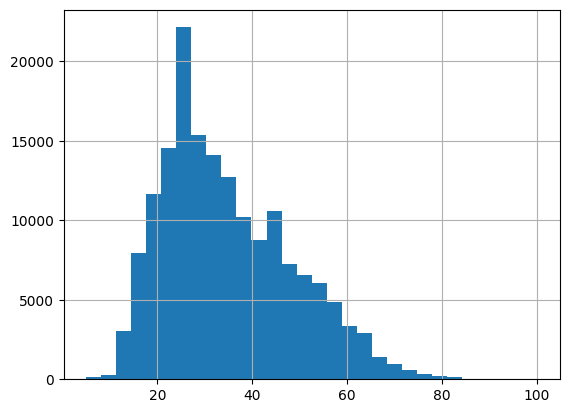

In [38]:
users_df['Age'].apply(parse_age).hist(bins=30)

## Ratings EDA

In [26]:
ratings_df.head()

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
ratings_df.isna().sum()

User-ID    0
ISBN       0
Rating     0
dtype: int64

<Axes: ylabel='Rating'>

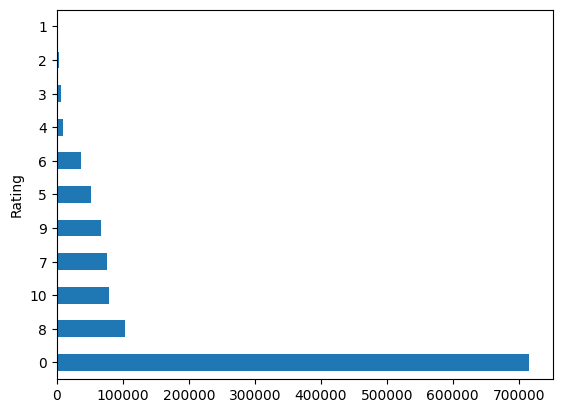

In [36]:
ratings_df['Rating'].value_counts().plot.barh()